<a href="https://colab.research.google.com/github/shariq101/Understanding-Keras-Layers/blob/main/Boston_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']), 
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([0,max(history.history['val_mae'])])

def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [1000$]')
  plt.ylabel('Predictions [1000$]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error [1000$]")
  _ = plt.ylabel("Count")

In [ ]:
boston_housing = tf.keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [ ]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


In [ ]:
print(train_data[0])  # Display sample features, notice the different scales

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [ ]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [ ]:
print(train_labels[0:10])  # Display first 10 entries

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [ ]:
# Test data is *not* used when calculating the mean and std.
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [ ]:
def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(train_data.shape[1],)),                  
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 500
# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/500
11/11 [==============================] - 2s 49ms/step - loss: 527.2416 - mae: 20.9895 - val_loss: 555.4816 - val_mae: 21.6179
Epoch 2/500
11/11 [==============================] - 0s 10ms/step - loss: 454.8207 - mae: 19.1720 - val_loss: 481.2345 - val_mae: 19.7485
Epoch 3/500
11/11 [==============================] - 0s 12ms/step - loss: 381.2265 - mae: 17.1306 - val_loss: 396.8144 - val_mae: 17.5271
Epoch 4/500
11/11 [==============================] - 0s 12ms/step - loss: 303.5882 - mae: 14.9399 - val_loss: 321.6758 - val_mae: 15.3602
Epoch 5/500
11/11 [==============================] - 0s 8ms/step - loss: 231.6746 - mae: 12.6879 - val_loss: 238.8167 - val_mae: 12.7606
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 161.1012 - mae: 10.2410 - val_loss: 164.9794 - val_mae: 9.9823
Epoch 7/500
11/11 [==============================] - 0s 6ms/step - loss: 107.4148 - mae: 8.0637 - val_loss: 118.3897 - val_mae: 8.1794
Epoch 8/500
11/11 [=====================

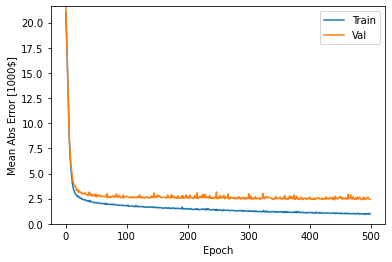

In [ ]:
plot_history(history)

In [ ]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2720.66


4/4 [==============================] - 0s 3ms/step


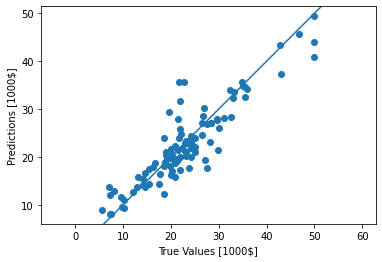

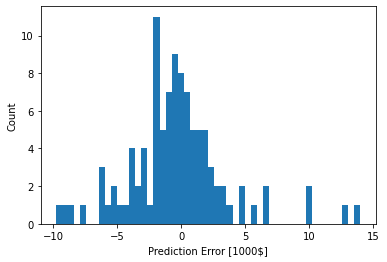

In [ ]:
test_predictions = model.predict(test_data).flatten()
plot_prediction(test_labels, test_predictions)

In [ ]:
print(train_data.shape)
print(train_data[0].shape)
print(train_data[0])

(404, 13)
(13,)
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [ ]:
sample_size = train_data.shape[0] # number of samples in train set
time_steps  = train_data.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = train_data.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", train_data_reshaped.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (404, 13, 1)
1 Sample shape:
 (13, 1)
An example sample:
 [[-0.27224633]
 [-0.48361547]
 [-0.43576161]
 [-0.25683275]
 [-0.1652266 ]
 [-0.1764426 ]
 [ 0.81306188]
 [ 0.1166983 ]
 [-0.62624905]
 [-0.59517003]
 [ 1.14850044]
 [ 0.44807713]
 [ 0.8252202 ]]


In [16]:
test_data_reshaped = test_data.reshape(test_data.shape[0],test_data.shape[1],1)

In [17]:
def build_conv1D_model():

  n_timesteps = train_data_reshaped.shape[1] #13
  n_features  = train_data_reshaped.shape[2] #1 
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
  
  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
  
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 7, 64)             512       
                                                                 
 dropout (Dropout)           (None, 7, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 5, 32)             6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 4, 16)             1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 2, 16)            0         
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

In [18]:
# Store training stats
history = model_conv1D.fit(train_data_reshaped, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/500
11/11 [==============================] - 4s 79ms/step - loss: 544.5771 - mae: 21.4561 - val_loss: 549.2717 - val_mae: 21.4930
Epoch 2/500
11/11 [==============================] - 0s 29ms/step - loss: 382.8568 - mae: 17.1227 - val_loss: 292.7098 - val_mae: 14.5545
Epoch 3/500
11/11 [==============================] - 0s 17ms/step - loss: 177.6613 - mae: 10.7967 - val_loss: 172.9259 - val_mae: 10.3221
Epoch 4/500
11/11 [==============================] - 0s 23ms/step - loss: 116.8802 - mae: 8.6478 - val_loss: 117.0820 - val_mae: 8.0473
Epoch 5/500
11/11 [==============================] - 0s 16ms/step - loss: 90.6928 - mae: 7.4297 - val_loss: 97.7117 - val_mae: 7.2289
Epoch 6/500
11/11 [==============================] - 0s 14ms/step - loss: 74.9205 - mae: 6.5567 - val_loss: 88.0078 - val_mae: 6.7793
Epoch 7/500
11/11 [==============================] - 0s 13ms/step - loss: 60.3871 - mae: 5.7372 - val_loss: 70.1549 - val_mae: 5.9535
Epoch 8/500
11/11 [=============================

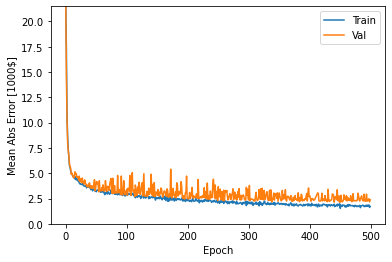

In [19]:
plot_history(history)

In [20]:
[loss, mae] = model_conv1D.evaluate(test_data_reshaped, test_labels, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2912.88


4/4 [==============================] - 0s 5ms/step


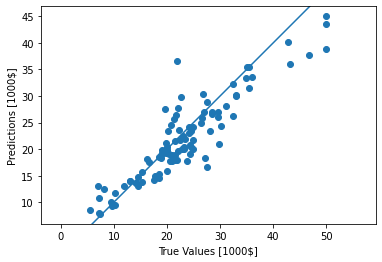

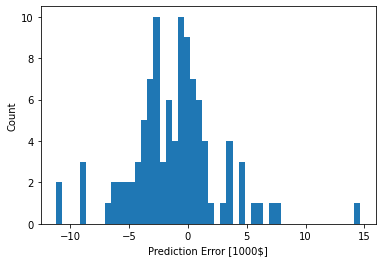

In [21]:
test_predictions = model_conv1D.predict(test_data_reshaped).flatten()
plot_prediction(test_labels, test_predictions)

In [22]:
def build_multi_conv1D_model():

  n_timesteps = train_data_reshaped.shape[1] #13
  n_features  = train_data_reshaped.shape[2] #1 
  #(name="model_conv1D")
  
  input = keras.layers.Input(shape=(n_timesteps,n_features))
  
  # Conv1D + global max pooling
  x = keras.layers.Conv1D(32, 1, padding="valid", activation="relu", strides=1)(input)
  x = keras.layers.Conv1D(32, 3, padding="valid", activation="relu", strides=1)(x)
  x = keras.layers.Conv1D(32, 5, padding="valid", activation="relu", strides=1)(x)
  x = keras.layers.GlobalMaxPooling1D()(x)

  # We add a vanilla hidden layer:
  x = keras.layers.Dense(32, activation="relu")(x)
  x = keras.layers.Dropout(0.5)(x)

  # We project onto a single unit output layer, and squash it with a sigmoid:
  predictions = keras.layers.Dense(n_features, name="predictions")(x)


  model= Model(input,predictions)

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D_2 = build_multi_conv1D_model()
model_conv1D_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 13, 32)            64        
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            3104      
                                                                 
 conv1d_2 (Conv1D)           (None, 7, 32)             5152      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                             

In [23]:
# Store training stats
history = model_conv1D_2.fit(train_data_reshaped, train_labels, epochs=500,
                    validation_split=0.2, verbose=1)

Epoch 1/500
11/11 [==============================] - 2s 34ms/step - loss: 527.6031 - mae: 21.0490 - val_loss: 494.9145 - val_mae: 20.2850
Epoch 2/500
11/11 [==============================] - 0s 13ms/step - loss: 345.0980 - mae: 15.9768 - val_loss: 228.5261 - val_mae: 12.7984
Epoch 3/500
11/11 [==============================] - 0s 15ms/step - loss: 195.3714 - mae: 11.5706 - val_loss: 131.7892 - val_mae: 9.2708
Epoch 4/500
11/11 [==============================] - 0s 13ms/step - loss: 151.5652 - mae: 9.8596 - val_loss: 120.0969 - val_mae: 8.6202
Epoch 5/500
11/11 [==============================] - 0s 21ms/step - loss: 133.5346 - mae: 9.0435 - val_loss: 129.3489 - val_mae: 8.7748
Epoch 6/500
11/11 [==============================] - 0s 14ms/step - loss: 123.6718 - mae: 8.6926 - val_loss: 126.1511 - val_mae: 8.5071
Epoch 7/500
11/11 [==============================] - 0s 16ms/step - loss: 129.7041 - mae: 8.6498 - val_loss: 89.9218 - val_mae: 6.7912
Epoch 8/500
11/11 [=========================

In [24]:
[loss, mae] = model_conv1D_2.evaluate(test_data_reshaped, test_labels, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $3534.14


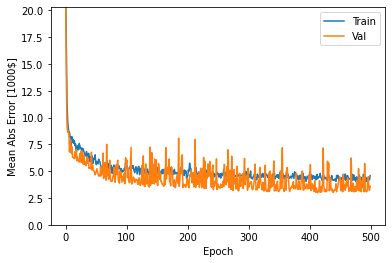

In [25]:
plot_history(history)